# Batch Preprocessing of Series Data

This notebook demonstrates efficient preprocessing of entire series:
- Applying filters to continuous data
- Rate limiting and smoothing
- Artifact removal across series
- Preprocessing before splitting

In [1]:
# Import necessary libraries
import matplotlib.pyplot as plt
import numpy as np
import pypipr

In [2]:
ps = pypipr.load_real_series()
pupil_measurements = ps.split(prepulse_duration=10.0, postpulse_duration=60.0)


In [3]:
# Create comprehensive fits for each measurement
print("Performing comprehensive fitting analysis on all measurements...")
fits = []
fit_params = []

for i, measurement in enumerate(pupil_measurements):
    print(f"Fitting measurement {i + 1}...")

    # Apply baseline correction
    measurement_corrected = measurement.copy()
    baseline = measurement_corrected.calculate_baseline(duration=5.0)
    measurement_corrected.apply_baseline_correction(baseline)

    # Create and fit comprehensive model
    fit = pypipr.PupilFit(measurement_corrected )

    fits.append(fit)

    # Extract parameters
    params = fit.get_all_params()
    fit_params.append(params)

    print(f"  Fit completed for measurement {i + 1}")

print(f"\nCompleted fitting for {len(fits)} measurements")


Performing comprehensive fitting analysis on all measurements...
Fitting measurement 1...
  Fit completed for measurement 1
Fitting measurement 2...
  Fit completed for measurement 2
Fitting measurement 3...
  Fit completed for measurement 3
Fitting measurement 4...
  Fit completed for measurement 4
Fitting measurement 5...
  Fit completed for measurement 5
Fitting measurement 6...
  Fit completed for measurement 6

Completed fitting for 6 measurements


C:\Users\20182727\OneDrive - TU Eindhoven\Documents\Tools\pypipr_package\pypipr\analysis\fitting\phase_fits.py:32: UserWarning: Baseline measurement is often 10 seconds long. If this is not the case, results may be inaccurate.
  warnings.warn(
C:\Users\20182727\OneDrive - TU Eindhoven\Documents\Tools\pypipr_package\pypipr\analysis\fitting\phase_fits.py:152: UserWarning: There is an issue with the implementation of the constriction phase. Defaulting to NaN.
  warnings.warn(
C:\Users\20182727\OneDrive - TU Eindhoven\Documents\Tools\pypipr_package\pypipr\analysis\fitting\pupil_fit.py:73: UserWarning: Automatic sustain fit is not yet implemented. Defaulting to NaN.
  warnings.warn("Automatic sustain fit is not yet implemented. Defaulting to NaN.")


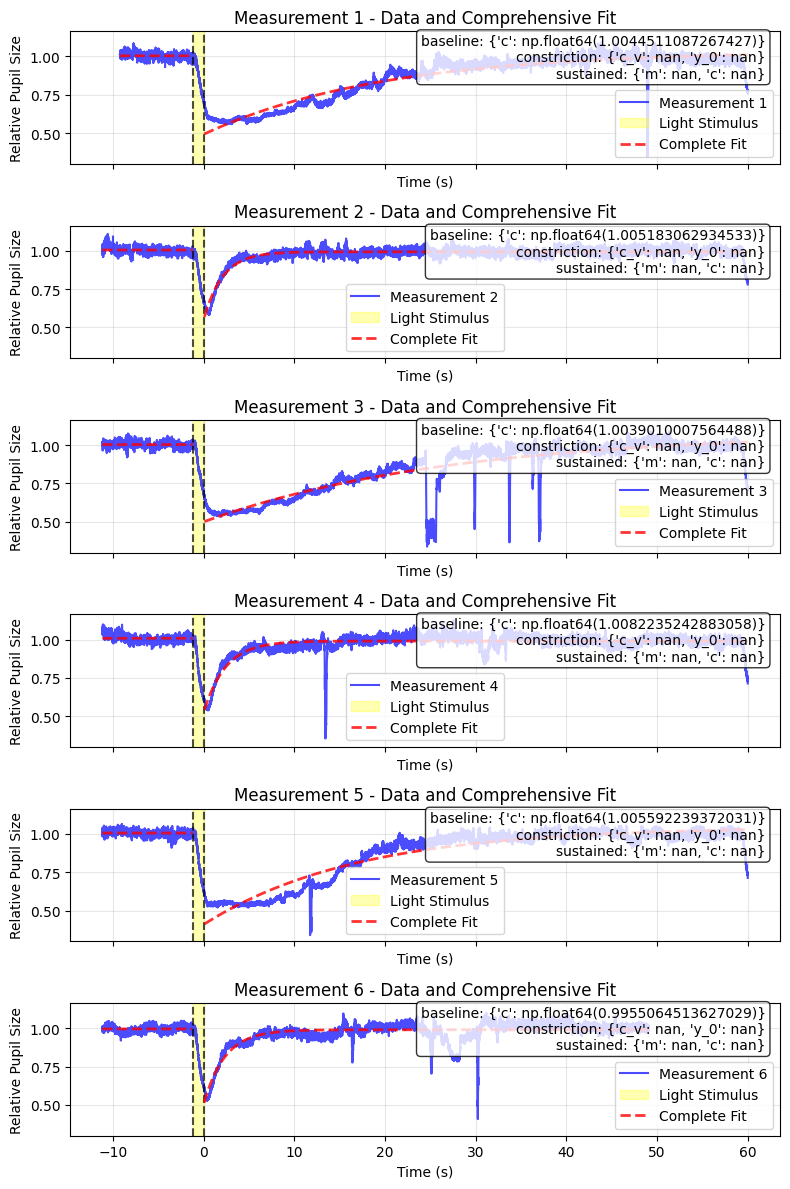

In [4]:
# Visualize fits for all measurements
fig, axes = plt.subplots(
    len(pupil_measurements),
    1,
    figsize=(8, 2 * len(pupil_measurements)),
    sharex=True,
    sharey=True,
)

if len(pupil_measurements) == 1:
    axes = [axes]  # Make it iterable for single subplot

for i, (measurement, fit) in enumerate(zip(pupil_measurements, fits)):
    ax = axes[i]

    # Apply baseline correction
    measurement_corrected = measurement.copy()
    baseline = measurement_corrected.calculate_baseline(duration=5.0)
    measurement_corrected.apply_baseline_correction(baseline)

    # Plot raw measurement
    measurement_corrected.plot(
        ax=ax, label=f"Measurement {i + 1}", color="blue", alpha=0.7
    )

    # Plot light stimulus
    measurement.plot_light_stimulus(
        ax=ax, alpha=0.4, color="yellow", label="Light Stimulus"
    )

    # Plot comprehensive fit
    time_fit = np.linspace(
        measurement_corrected.get_time()[0], measurement_corrected.get_time()[-1], 500
    )
    prediction = fit.predict(time_fit)
    ax.plot(time_fit, prediction, "r--", linewidth=2, alpha=0.8, label="Complete Fit")

    ax.set_title(f"Measurement {i + 1} - Data and Comprehensive Fit")
    ax.set_ylabel("Relative Pupil Size")
    ax.legend()
    ax.grid(True, alpha=0.3)

    # Add parameter info
    params = fit_params[i]
    param_text = "\n".join(
        [f"{k}: {v}" for k, v in list(params.items())[:3]]
    )  # Show first 3 params
    ax.text(
        0.98,
        0.98,
        param_text,
        transform=ax.transAxes,
        verticalalignment="top",
        horizontalalignment="right",
        bbox=dict(boxstyle="round", facecolor="white", alpha=0.8),
    )

axes[-1].set_xlabel("Time (s)")
plt.tight_layout()
plt.show()
